In [ ]:
pip install opencv-python numpy scipy scikit-image torch matplotlib Pillow

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
import cv2
import numpy as np
import scipy
from scipy import ndimage
import skimage
from skimage import io
import torch
import matplotlib.pyplot as plt
from PIL import Image

# Crop Health Analysis Using Drone Images

## Introduction
This notebook demonstrates the process of segmenting an aerial image of farmland into different regions, such as healthy crops, unhealthy crops, and non-crop areas (e.g., soil, weeds, water). The goal is to analyze these segments to assess the health of the crops and provide insights that can help farmers make informed decisions.

## Step 1: Image Creation/Acquisition
First, we will either create or load an image that simulates an aerial view of farmland. The image will include distinct regions representing healthy crops, unhealthy crops, and other elements like soil or water.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MV/Lab 5/farm.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Step 2: Image Segmentation
Next, we'll perform image segmentation to separate the different regions of the farmland. This step involves converting the image to different color spaces and applying thresholding or clustering techniques to identify distinct areas.

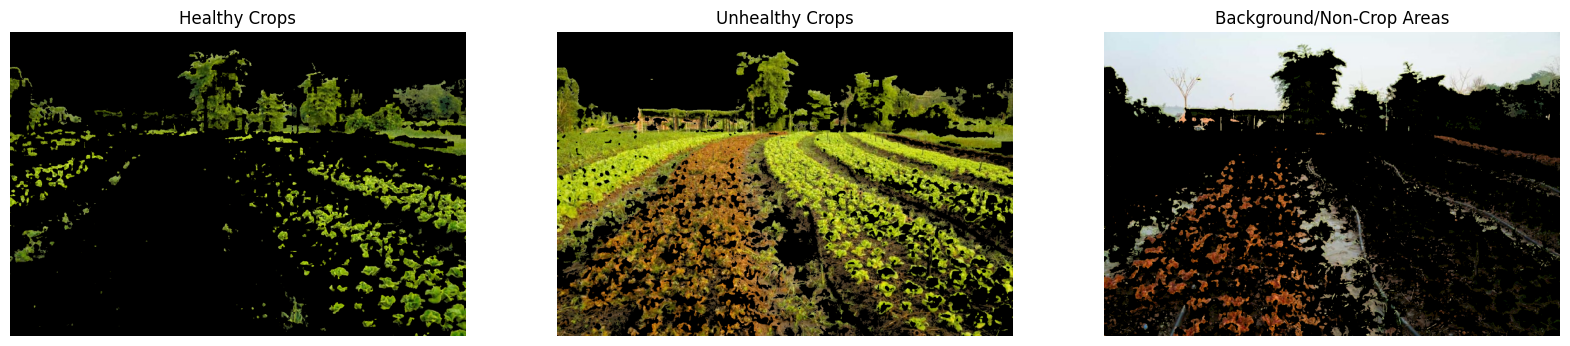

In [4]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

healthy_lower = np.array([35, 100, 50])
healthy_upper = np.array([85, 255, 255])

unhealthy_lower = np.array([15, 100, 50])
unhealthy_upper = np.array([35, 255, 255])

healthy_mask = cv2.inRange(image_hsv, healthy_lower, healthy_upper)
healthy_segment = cv2.bitwise_and(image_rgb, image_rgb, mask=healthy_mask)

unhealthy_mask = cv2.inRange(image_hsv, unhealthy_lower, unhealthy_upper)
unhealthy_segment = cv2.bitwise_and(image_rgb, image_rgb, mask=unhealthy_mask)

background_mask = cv2.bitwise_not(cv2.bitwise_or(healthy_mask, unhealthy_mask))
background_segment = cv2.bitwise_and(image_rgb, image_rgb, mask=background_mask)

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(healthy_segment)
plt.title("Healthy Crops")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(unhealthy_segment)
plt.title("Unhealthy Crops")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(background_segment)
plt.title("Background/Non-Crop Areas")
plt.axis('off')

plt.show()

## Step 3: Extraction and Display of Segmented Regions
We'll now extract and display the segmented regions of interest, specifically focusing on the healthy and unhealthy crops.

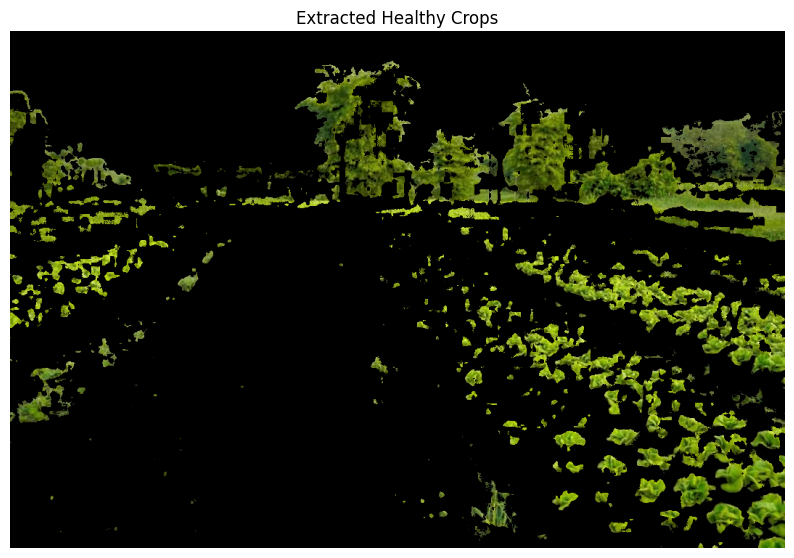

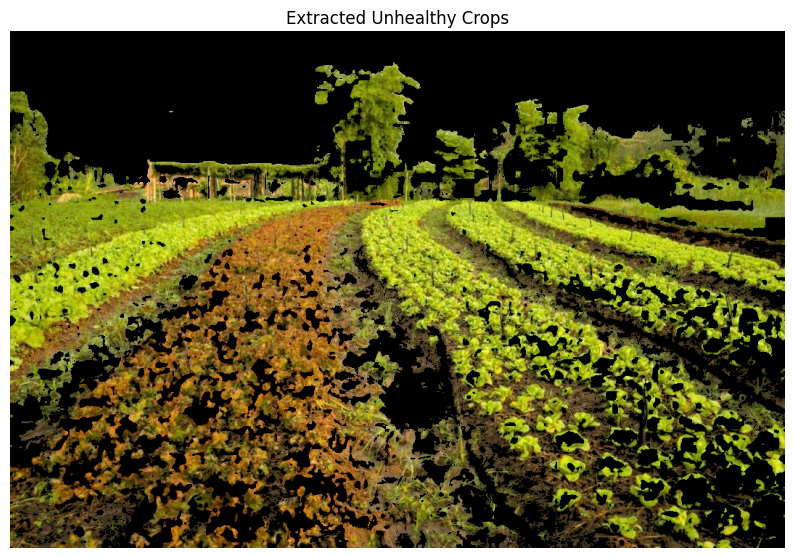

In [5]:
# Extract and display the healthy crops
plt.figure(figsize=(10, 10))
plt.imshow(healthy_segment)
plt.title("Extracted Healthy Crops")
plt.axis('off')
plt.show()

# Extract and display the unhealthy crops
plt.figure(figsize=(10, 10))
plt.imshow(unhealthy_segment)
plt.title("Extracted Unhealthy Crops")
plt.axis('off')
plt.show()

## Step 4: Analysis and Description
In this step, we'll analyze the segmented regions to describe their characteristics, such as area, shape, and color distribution. We'll use this information to assess the health of the crops.

In [6]:
healthy_area = np.sum(healthy_mask > 0)
unhealthy_area = np.sum(unhealthy_mask > 0)

healthy_mean_color = cv2.mean(image_rgb, mask=healthy_mask)
unhealthy_mean_color = cv2.mean(image_rgb, mask=unhealthy_mask)

print(f"Healthy Crops Area: {healthy_area} pixels")
print(f"Unhealthy Crops Area: {unhealthy_area} pixels")
print(f"Healthy Crops Mean Color (RGB): {healthy_mean_color[:3]}")
print(f"Unhealthy Crops Mean Color (RGB): {unhealthy_mean_color[:3]}")

Healthy Crops Area: 119265 pixels
Unhealthy Crops Area: 419175 pixels
Healthy Crops Mean Color (RGB): (107.61446358948561, 130.31336938749843, 28.136259589988683)
Unhealthy Crops Mean Color (RGB): (132.6914820778911, 124.6245983181249, 34.35988548935409)
